In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')
sns.set_context('notebook')

In [2]:
## LIF properties
r_m = 1 # resistance (kOhm)
c_m = 10  # capacitance (uF)
tau_m = r_m*c_m  # time constant (msec)
tau_ref = 4  # refractory period (msec)
v_th = 1  # spike threshold (V)
v_spike = 0.5  # spike delta (V)

In [3]:
## parameters and state variables
T = 50  # total time to simulate (msec)
dt = 0.125  # simulation time step (msec)
time = np.arange(0, T+dt, dt)  # time array
t_rest = 0  # initial refractory time
v_m = np.zeros(len(time))  # potential (V) trace over time 

## Input stimulus
stim = 1.5  # input current (A)

In [4]:
## simulate the model
for i, t in enumerate(time): 
    if t > t_rest:
        v_m[i] = v_m[i-1] + (-v_m[i-1] + stim*r_m) / tau_m * dt
        
    if v_m[i] >= v_th:
        v_m[i] += v_spike
        t_rest = t + tau_ref

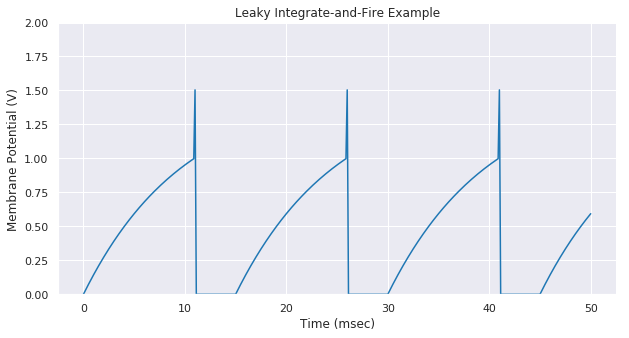

In [5]:
## plot membrane potential trace  
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.plot(time, v_m)
plt.title('Leaky Integrate-and-Fire Example')
plt.ylabel('Membrane Potential (V)')
plt.xlabel('Time (msec)')
plt.ylim([0,2])
sns.despine()